# Gorilla in the data

Reproduce data from this paper:
https://www.biorxiv.org/content/10.1101/2020.07.30.228916v1.full

In [8]:
library(tidyverse)
library(jpeg)

In [6]:
download.file('https://classroomclipart.com/images/gallery/Clipart/Black_and_White_Clipart/Animals/gorilla-waving-cartoon-black-white-outline-clipart-914.jpg', 'gorilla.jpg')

In [10]:
gorilla <- readJPEG("gorilla.jpg")

In [34]:
tidy_gorilla <- gorilla[,,1] %>%
    as_tibble %>%
    mutate(row=n()-row_number()) %>%
    pivot_longer(V1:V412,names_to="column",values_to="intensity") %>%
    mutate(column = as.integer(str_remove(column,"V")))

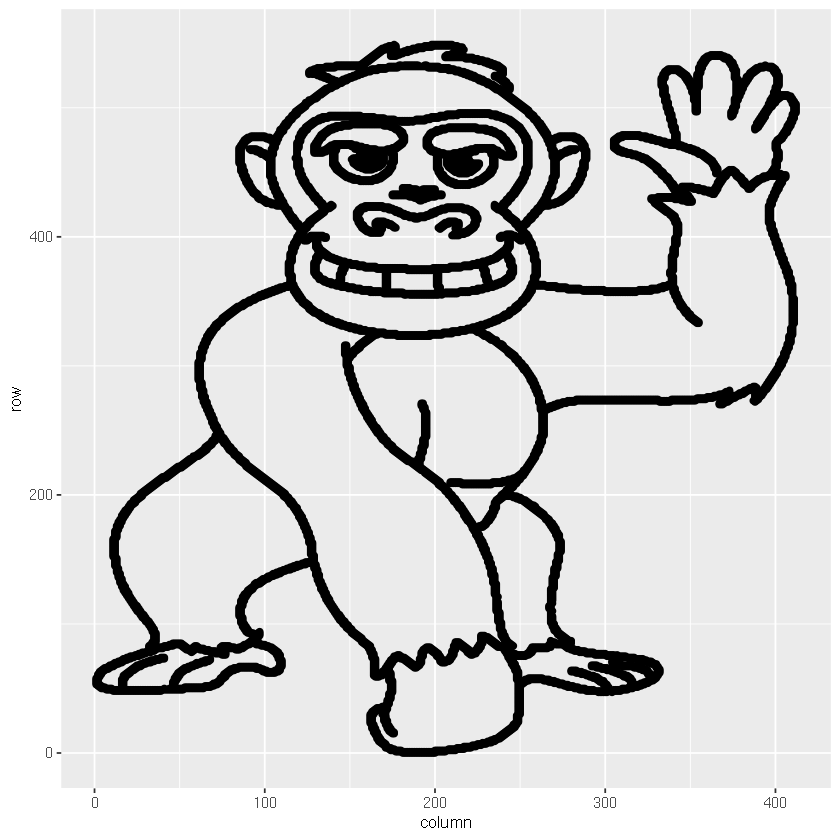

In [56]:
tidy_gorilla %>%
    filter(intensity<.4) %>%
    ggplot(aes(column, row)) +
    geom_point()

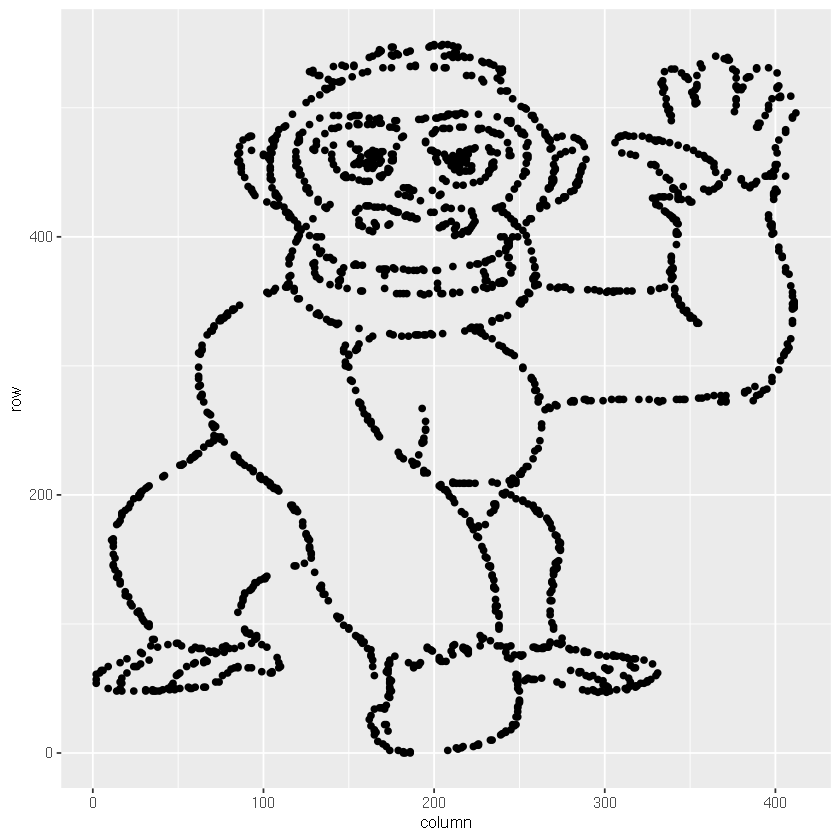

In [40]:
tidy_gorilla %>%
    filter(intensity<.4) %>%
    sample_n(1786) %>%
    ggplot(aes(column, row)) +
    geom_point()

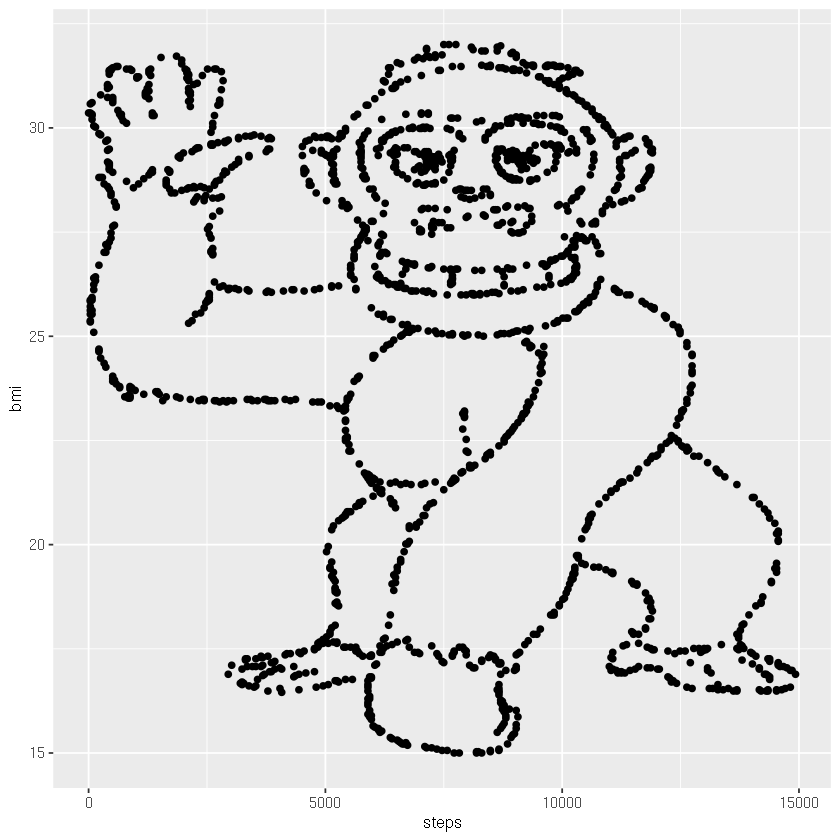

In [48]:
fake_data <- tidy_gorilla %>%
    filter(intensity<.4) %>%
    sample_n(1786) %>%
    transmute(
        bmi = (row/max(row)) * 17 + 15,
        steps = 15000-column*15000/max(column)
    )
fake_data %>%
    ggplot(aes(steps,bmi)) + geom_point()

In [52]:
fake_data <- fake_data %>%
    mutate(
        i=steps*(1+rnorm(n(),0,10)),
        sex=if_else(i<=median(steps),"female","male")
    ) %>%
    select(-i)
fake_data %>%
    count(sex)

sex,n
<chr>,<int>
female,943
male,843


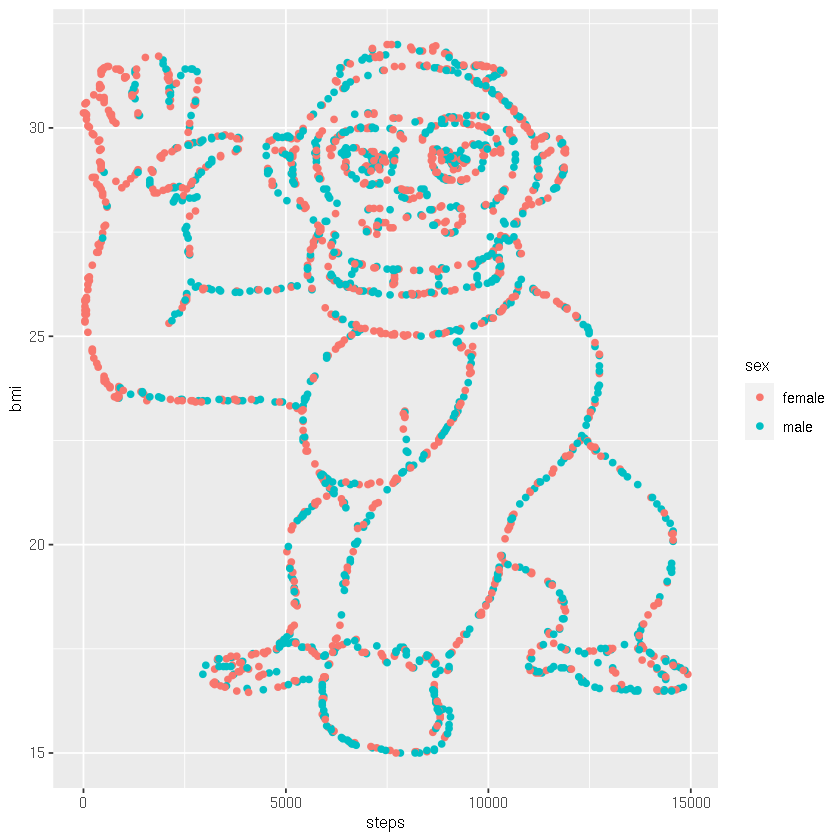

In [53]:
fake_data %>%
    ggplot(aes(steps,bmi,color=sex)) + geom_point()

In [55]:
fake_data %>% filter(sex=="female") %>% select(steps,bmi) %>% write_tsv("data9b_w.txt")
fake_data %>% filter(sex=="male") %>% select(steps,bmi) %>% write_tsv("data9b_m.txt")

## Tasks

### Hypothesis focused group

    Download the two files data9b_w.txt and data9b_m.txt. Each row in both files contains for one person (women in data9b_w.txt, men in data9b_m.txt9) the number of steps that this person took on a particular day (steps) and the body mass index (bmi). Assume that both traits are normally distributed for males and for females. Consider the following (alternative, not null) hypotheses:

        a) There is a difference in the mean number of steps between women and men.

        b) The correlation coefficient between steps and bmi is negative for women.

        c) The correlation coefficient between steps and bmi is positive for men.

    Think about which test to use and calculate the corresponding P-value.

    Which other conclusions can you draw from the data?

### Hypothesis free group

    Download the two files data9b_w.txt and data9b_m.txt. Each row in both files contains for one person (women in data9b_w.txt, men in data9b_m.txt9) the number of steps that this person took on a particular day (steps) and the body mass index (bmi). Assume that both traits are normally distributed for males and for females.

    Examine the data appropriately! What do you notice? What conclusions can you draw from the data?